In [31]:
import numpy as np
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt

# Pytorch

## Basics

Сегодня мы узнаем про pytorch -- самый популярный фреймворк для глубинного обучения.


Полезные ссылки:
- https://pytorch.org/tutorials/beginner/basics/intro.html -- тут официальные туториалы, документация

pytorch очень похож на numpy. Например, объявим две матрицы -- в numpy и pytorch:

In [2]:
a = np.ones((10, 20))
b = np.ones((10, 20))
c = torch.ones((10, 20))
d = torch.ones((10, 20))

Поэлементно умножим и возьмем сумму:

In [3]:
(a * b).sum(), (c * d).sum()

(200.0, tensor(200.))

Посмотрим на размерности поэлементного умножения:

In [4]:
(a * b).shape, (c * d).shape

((10, 20), torch.Size([10, 20]))

Умножим матрично и возьмем сумму:

In [5]:
(a.T @ b).sum(), (c.T @ b).sum()

(4000.0, tensor(4000., dtype=torch.float64))

На практике это означает, что если вы разобрались с основными операциями в numpy, то и с торчём вам должно быть достаточно просто. Но всё же несколько отличий есть, вот некоторые из них

In [6]:
a.sum(axis=1), d.sum(dim=1) # ключевое слово axis всегда нужно менять на dim

(array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]),
 tensor([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]))

In [7]:
a.astype('int64'), c.type(torch.LongTensor) # вот так отличается каст типов

(array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1

Есть страничка, где описаны эти различия. Если возникают сложности, то можно идти туда или в документацию.
https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

Для разминки:
###  Задание 0

Реализуйте следующие функции на pytorch-e

In [12]:
def mse_loss(y_predicted, y_true):
    return torch.mean(torch.pow(y_predicted-y_true, 2))

def log_loss(predicted_probas, y_true): 
    return -torch.mean(torch.log(torch.abs(predicted_probas-(1-y_true))))

In [13]:
y_true = torch.tensor([0.5, 0.1, -0.5, 0.2, -0.1, 10, 2])
y_pred = torch.tensor([0.52, 0.13, 0.0, 0.2, -0.5, 10.2, 2.1])
assert torch.allclose(mse_loss(y_pred, y_true), F.mse_loss(y_pred, y_true))
y_true = torch.tensor([0.0, 0.0, 1.0, 1.0])
y_pred = torch.tensor([0.2, 0.3, 0.7, 0.5])
print(log_loss(y_pred, y_true), F.binary_cross_entropy(y_pred, y_true))
assert torch.allclose(log_loss(y_pred, y_true), F.binary_cross_entropy(y_pred, y_true), rtol=1e-4)

tensor(0.4074) tensor(0.4074)


Самое важное, что умеет pytorch -- это автоматическое дифференциирование.
Рассмотрим пример -- какую-нибудь супер-простую функцию

$$
    f(x) = x^2 + 2x + 3
$$

In [16]:
-torch.log(torch.tensor(0))

tensor(inf)

In [17]:
def very_simple_function(x):
    return x**2 + 2 * x + 3

Посчитаем, например, производную в точке 3. Должно получиться 8 :)

In [18]:
x = torch.tensor(3.0, requires_grad=True) # Объявим скаляр, тут важно, что флажок requires_grad должен быть True
# этот флажок -- сигнал для торча, что по этой сущности нужно считать производную
result = very_simple_function(x)

In [20]:
x.grad

In [21]:
result.backward() # делаем backward-step -- как видно -- это сущность чуть более общая,
# чем просто про нейронные сети :)

In [22]:
x.grad # и действительно получается 8

tensor(8.)

А теперь интересные вещи, давайте сделаем это еще раз:

In [23]:
result = very_simple_function(x)
result.backward()
x.grad

tensor(16.)

Тут дело в том, что torch сохраняет производные в переменных, если их специально не обнулить:

In [24]:
x.grad.zero_()
result = very_simple_function(x)
result.backward()
x.grad

tensor(8.)

Подсуммируем, в итоге пайплайн выглядит вот так:

@ Объявляем переменные с required_grad=True

@ Считаем некоторую скалярную функцию

@ Делаем от результата .backward()

@ PROFIT!!! теперь у каждой переменной доступно поле .grad, в котором лежит градиент по этой переменной


Теперь пример более про ML:

In [26]:
x1 = torch.tensor(3.0, requires_grad=True)
y1 = torch.tensor(3.0, requires_grad=True)
(x1**2+y1**2-9).backward()
print(x1.grad, y1.grad)

tensor(6.) tensor(6.)


/Users/bolevard/.pyenv/versions/3.8.13/envs/3_8_jupyter/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

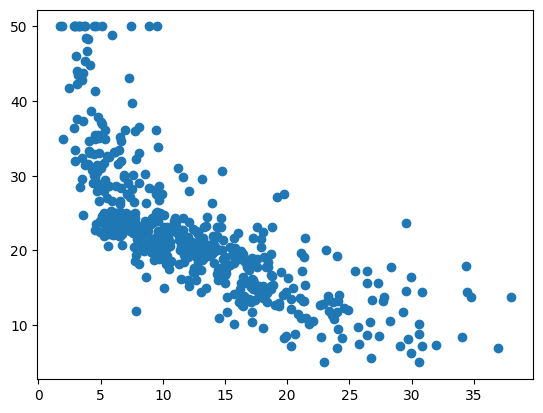

In [32]:
from sklearn.datasets import load_boston

boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)
plt.show()

In [104]:
torch.rand(1)

tensor([0.0552])

In [141]:
w0 = torch.rand(1, requires_grad=True)
w1 = torch.rand(1, requires_grad=True)
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [142]:
y_pred = w0 * x + b
loss = mse_loss(y_pred, y) # Вы должны были написать эту функцию в задании 1

loss.backward()

In [143]:
print("производная по w = \n", w.grad)
print("производная по b = \n", b.grad)

производная по w = 
 None
производная по b = 
 tensor([-43.8203])


In [144]:
import matplotlib.pyplot as plt
from IPython.display import clear_output


for i in range(10000):

    y_pred = w0*1/x + b#w0 * x + w**2 + b + w3*1/x + w1 # w1*x**2 
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # тут важно  использовать .data, работая с этим полем у тензора напрямую
    # мы не триггерим подсчет градиентов
    # при шаге градиентного спуска градиенты считать не надо, они уже посчитаны
    # шаг градиентного спуска
    learning_rate = 0.005
    w0.data -= w0.grad*learning_rate
    b.data -= b.grad*learning_rate
    # w1.data -= w1.grad*learning_rate
    # w.data -= w.grad*learning_rate
    # w3.data -= w1.grad*learning_rate

    # обнуляем градиенты
    w0.grad.data.zero_()
    b.grad.data.zero_()
    # w1.grad.data.zero_()
    # w3.grad.data.zero_()
    # w.grad.data.zero_()
    # логгирование
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

KeyboardInterrupt: 

Вы должны получить лосс около 44.59417

**Бонусное задание**
Попробуйте закодить более нелинейную функцию вместо  $w \cdot x + b$, чтобы лосс был поменьше, а приближение поточнее. Предлагается менять функцию прямо в коде выше